In [67]:
import numpy
import pandas
import math
import matplotlib
import seaborn

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline

numpy.random.seed(seed = 42)

In [5]:
x = numpy.random.normal(0,1,100)

array([-1.22809382, -0.98347434, -0.32272999, -0.72893558, -1.35432346,
        0.06514377,  0.11596404,  0.85210008, -1.31280051,  0.67515972,
        1.73994644, -0.59361175, -0.31824656,  0.95334643,  0.34621817,
        0.79952501, -1.21130571, -0.45951004,  0.09739947,  0.21882445,
       -0.08140966,  0.64845923, -1.68269158, -0.00753157,  1.51112988,
       -0.33529404,  0.04654992, -0.46044845,  0.73438265, -0.02008756,
        0.33595276, -0.15999688,  1.16585937,  2.17922749, -0.59004492,
       -0.09869175, -1.07176474,  1.08017895, -1.25830409,  1.05229352,
       -1.40909921,  0.10452966,  0.88359586,  0.48981021,  0.98114817,
        1.35127258, -0.79712093,  0.43320799, -0.84381404,  1.51176004,
       -1.60463846, -0.10116928,  0.3643018 , -1.15278761, -1.07463473,
       -0.98798358, -3.21798297,  1.11343276, -0.45306504, -0.19881476,
        0.92875684,  0.15542913,  0.23733055,  0.55582484, -0.09013471,
        0.18097476, -0.19051056, -1.1562892 , -0.34856432, -0.64

In [12]:
eps = numpy.random.normal(0,0.5,100)

In [17]:
y = -1 + 0.5 * x + eps
len(y)
# The length of the vector y is 100. Beta 0 is -1 and beta 1 is 0.5 in this model.

100

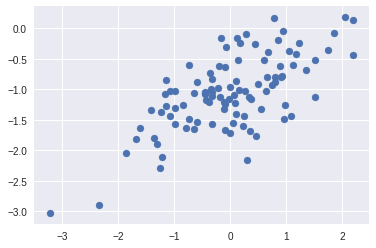

In [25]:
matplotlib.pyplot.scatter(x, y)
# The relationship between x and y seems linear with noise introduced.

In [27]:
data = {'x' : x, 'y' : y}
df = pandas.DataFrame(data, columns = ['x', 'y'])
df.head

<bound method NDFrame.head of            x         y
0  -1.228094 -1.365690
1  -0.983474 -1.560869
2  -0.322730 -0.837521
3  -0.728936 -0.602953
4  -1.354323 -1.794238
5   0.065144 -1.084497
6   0.115964 -0.152412
7   0.852100 -0.190233
8  -1.312801 -1.891137
9   0.675160 -0.391140
10  1.739946 -0.361736
11 -0.593612 -1.529671
12 -0.318247 -1.038142
13  0.953346 -1.479967
14  0.346218 -1.689350
15  0.799525 -0.881381
16 -1.211306 -2.112068
17 -0.459510 -1.072631
18  0.097399 -1.405312
19  0.218824 -1.596740
20 -0.081410 -0.307880
21  0.648459 -0.788659
22 -1.682692 -1.807582
23 -0.007532 -1.716140
24  1.511130 -0.516626
25 -0.335294 -1.112186
26  0.046550 -1.552222
27 -0.460448 -1.042375
28  0.734383 -0.933128
29 -0.020088 -1.155891
..       ...       ...
70 -0.980862 -1.309733
71  0.281220 -0.090372
72 -0.377962 -1.206894
73  0.783065  0.173854
74  0.288787 -2.165479
75  0.129445 -0.524326
76 -0.003569 -0.958261
77 -0.107978 -1.203493
78 -0.439345 -1.173792
79  0.463332 -1.762118
80 -

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     83.16
Date:                Fri, 29 Sep 2017   Prob (F-statistic):           9.86e-15
Time:                        19:19:14   Log-Likelihood:                -61.012
No. Observations:                 100   AIC:                             126.0
Df Residuals:                      98   BIC:                             131.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0526      0.045    -23.394      0.0

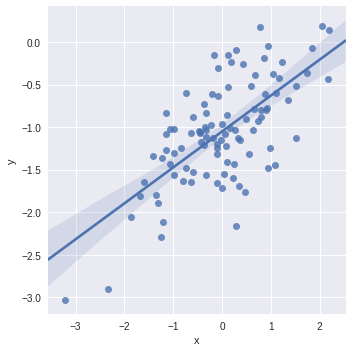

In [99]:
seaborn.lmplot(x = 'x', y = 'y', data = df)

fit0 = smf.ols('y~x',data = df).fit()
print(fit0.summary())

# From the summary of the fit, we see that both betas are significant. Beta 0 is closer to -1 
# than beta 1 is to 0.5. The p-value for the F-statistic is also very high in this model, 
# which tells us that we are confident that we can reject the null hypothesis that both 
# coefficients are null.

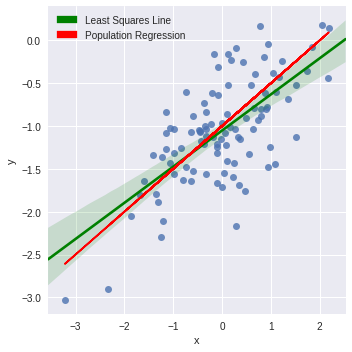

In [70]:
abline_values = [0.5 * i - 1 for i in x]

fig = matplotlib.pyplot.figure()
reg = seaborn.lmplot(x = 'x', y = 'y', data = df, line_kws={'color': 'green'})
popreg = matplotlib.pyplot.plot(x, abline_values, 'r')
lgreen = matplotlib.patches.Patch(color='green', label='Least Squares Line')
lred = matplotlib.patches.Patch(color='red', label='Population Regression')
matplotlib.pyplot.legend(handles=[lgreen, lred])
matplotlib.pyplot.show()


In [84]:
x_sq = x * x
data_sq = {'x' : x, 'x2' : x_sq, 'y' : y}
df_sq = pandas.DataFrame(data_sq, columns = ['x', 'x2', 'y'])
df_sq.head()

,x,x2,y
0,-1.228094,1.508214,-1.365690
1,-0.983474,0.967222,-1.560869
2,-0.322730,0.104155,-0.837521
3,-0.728936,0.531347,-0.602953
4,-1.354323,1.834192,-1.794238


In [85]:
fit1 = smf.ols('y~x+x2',data = df_sq).fit()
print(fit1.summary())

# From the fit summary below, we can see that x^2 is not a significant predictor for y in the 
# presence of x because the p-value of its coefficient is higher than 0.05.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     43.71
Date:                Fri, 29 Sep 2017   Prob (F-statistic):           2.94e-14
Time:                        18:31:37   Log-Likelihood:                -59.611
No. Observations:                 100   AIC:                             125.2
Df Residuals:                      97   BIC:                             133.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0048      0.053    -18.928      0.0

In [98]:
eps1 = numpy.random.normal(0,0.3,100)
y1 = -1 + 0.5 * x + eps1
data1 = {'x' : x, 'y' : y1}
df1 = pandas.DataFrame(data1, columns = ['x', 'y'])
fit2 = smf.ols('y~x',data = df1).fit()
print(fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     270.1
Date:                Fri, 29 Sep 2017   Prob (F-statistic):           6.40e-30
Time:                        19:19:01   Log-Likelihood:                -18.431
No. Observations:                 100   AIC:                             40.86
Df Residuals:                      98   BIC:                             46.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0019      0.029    -34.088      0.0

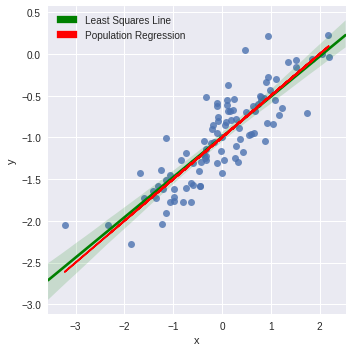

In [88]:
fig = matplotlib.pyplot.figure()
reg = seaborn.lmplot(x = 'x', y = 'y', data = df1, line_kws={'color': 'green'})
popreg = matplotlib.pyplot.plot(x, abline_values, 'r')
lgreen = matplotlib.patches.Patch(color='green', label='Least Squares Line')
lred = matplotlib.patches.Patch(color='red', label='Population Regression')
matplotlib.pyplot.legend(handles=[lgreen, lred])
matplotlib.pyplot.show()

# When we reduced the variance for the eps vector, we basically reduced the error in y's. 
# Therefore, the relationship between x and y is much closer to the real relationship (as 
# observed from the graph below). Also, the coefficient estimates for beta 0 and beta 1 
# are closer to -1 and 0, respectively. The p-values stay close to the same.

In [97]:
eps2 = numpy.random.normal(0,0.8,100)
y2 = -1 + 0.5 * x + eps2
data2 = {'x' : x, 'y' : y2}
df2 = pandas.DataFrame(data2, columns = ['x', 'y'])
fit3 = smf.ols('y~x',data = df2).fit()
print(fit3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     27.07
Date:                Fri, 29 Sep 2017   Prob (F-statistic):           1.08e-06
Time:                        19:18:46   Log-Likelihood:                -125.47
No. Observations:                 100   AIC:                             254.9
Df Residuals:                      98   BIC:                             260.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9811      0.086    -11.445      0.0

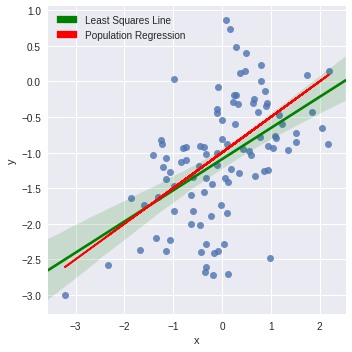

In [95]:
fig = matplotlib.pyplot.figure()
reg = seaborn.lmplot(x = 'x', y = 'y', data = df2, line_kws={'color': 'green'})
popreg = matplotlib.pyplot.plot(x, abline_values, 'r')
lgreen = matplotlib.patches.Patch(color='green', label='Least Squares Line')
lred = matplotlib.patches.Patch(color='red', label='Population Regression')
matplotlib.pyplot.legend(handles=[lgreen, lred])
matplotlib.pyplot.show()
# When we increased the variance for the eps vector, we basically increased the error in y's. 
# Therefore, the relationship between x and y is much further from the true relationship (as 
# observed from the graph below, the points are more scattered). Also, the coefficient 
# estimates for beta 0 and beta 1 are further from -1 and 0, respectively. The p-values stay
# close to the same.

In [ ]:
# Confidence intervals: (From fit summaries)
# Original set: Beta 0 [-1.142, -0.963], Beta 1 [0.330, 0.514]
# Less noisy set: Beta 0 [-1.050, -0.936], Beta 1 [0.423, 0.541]
# More noisy set: Beta 0 [-1.240, -0.946], Beta 1[0.287, 0.589]

# As we increase the noise in the data set, the confidence intervals for the betas become 
# larger.